In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Charger les données
app_train = pd.read_csv('./data/application_train.csv')
col_descriptions = pd.read_csv('./data/HomeCredit_columns_description.csv', encoding='latin1')
bureau_df = pd.read_csv('./data/bureau.csv')
previous_app_df = pd.read_csv('./data/previous_application.csv')

In [3]:
# Options d'affichage pour Pandas
pd.set_option('display.max_columns', None) # Afficher toutes les colonnes
pd.set_option('display.max_rows', 100)      # Limiter l'affichage des lignes pour la lisibilité

if not app_train.empty:
    print("Chargement des données réussi.")
    # Afficher les dimensions du DataFrame
    print(f"Dimensions du DataFrame application_train : {app_train.shape}")

    # Afficher les 5 premières lignes
    print("\nLes 5 premières lignes du DataFrame application_train :")
    display(app_train.head())
else:
    print("Le DataFrame est vide. Impossible de continuer sans les données.")

Chargement des données réussi.
Dimensions du DataFrame application_train : (307511, 122)

Les 5 premières lignes du DataFrame application_train :


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

--- Informations Générales (app_train.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


--- Statistiques Descriptives (app_train.describe()) ---


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97



--- Analyse de la Variable Cible (TARGET) ---
Distribution des classes pour TARGET:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Pourcentage de clients avec défaut de paiement (TARGET=1): 8.07%
Pourcentage de clients sans défaut de paiement (TARGET=0): 91.93%


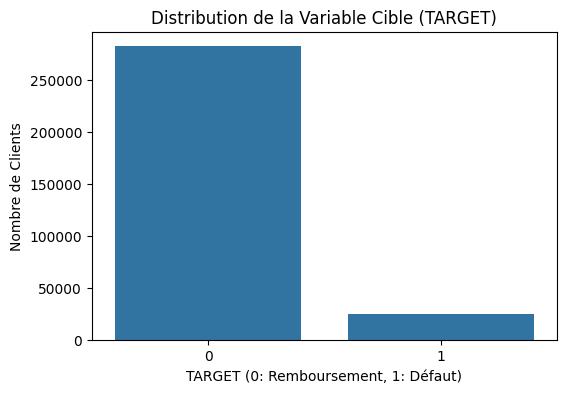

In [4]:
# 1. Informations générales sur le DataFrame
print("--- Informations Générales (app_train.info()) ---")
app_train.info()
print("\n") # Ajoute un saut de ligne pour la lisibilité

# 2. Statistiques descriptives pour les colonnes numériques
print("--- Statistiques Descriptives (app_train.describe()) ---")
display(app_train.describe())
print("\n")

# 3. Analyse de la variable cible 'TARGET'
print("--- Analyse de la Variable Cible (TARGET) ---")
target_counts = app_train['TARGET'].value_counts()
print("Distribution des classes pour TARGET:")
print(target_counts)
print(f"\nPourcentage de clients avec défaut de paiement (TARGET=1): {target_counts.get(1, 0) / app_train.shape[0] * 100:.2f}%")
print(f"Pourcentage de clients sans défaut de paiement (TARGET=0): {target_counts.get(0, 0) / app_train.shape[0] * 100:.2f}%")

# Visualisation de la distribution de la cible
plt.figure(figsize=(6,4))
sns.countplot(x='TARGET', data=app_train)
plt.title('Distribution de la Variable Cible (TARGET)')
plt.xlabel('TARGET (0: Remboursement, 1: Défaut)')
plt.ylabel('Nombre de Clients')
plt.show()

Analyse des valeurs manquantes et des types de variables...

--- Pourcentage de Valeurs Manquantes par Colonne (Top 60) ---


,Valeurs Manquantes,Pourcentage (%)
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953




--- Visualisation des Valeurs Manquantes (Matrice missingno) ---


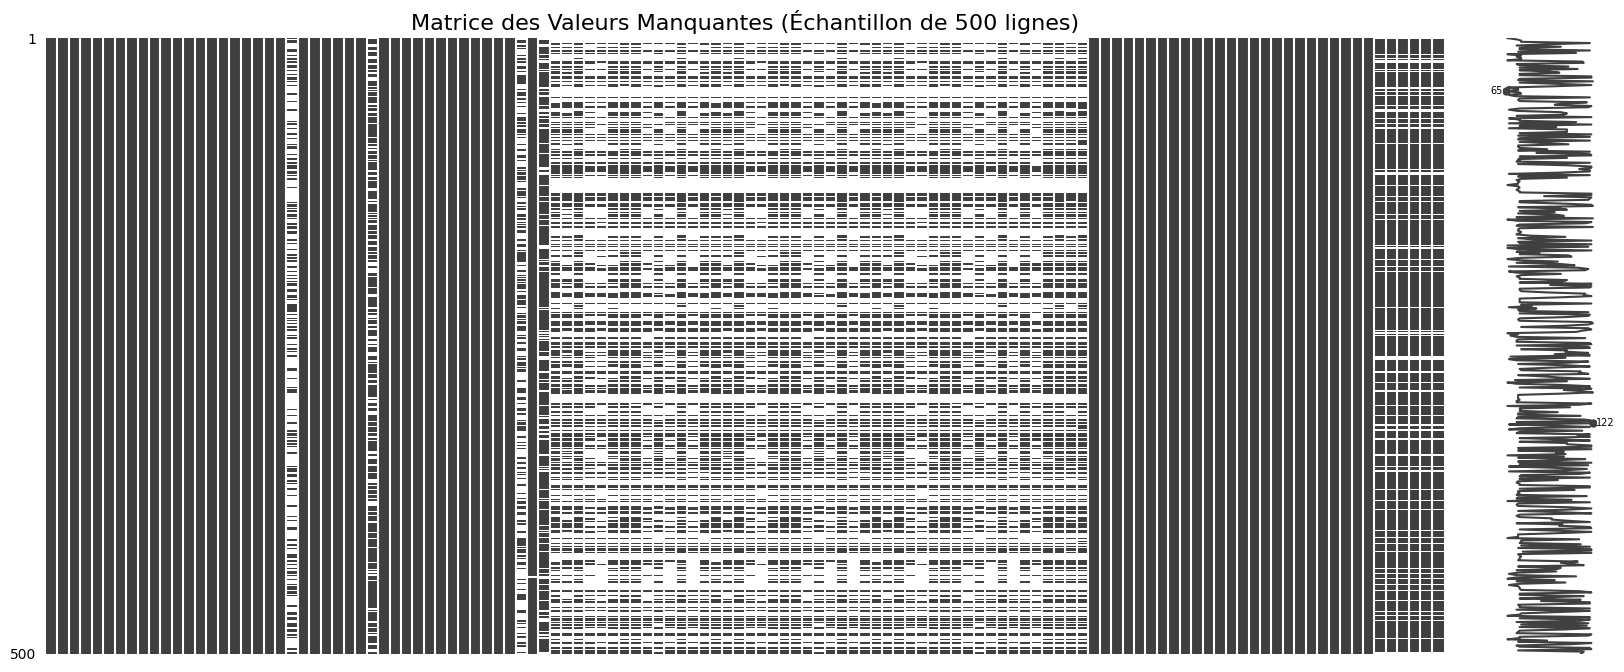



--- Visualisation des Valeurs Manquantes (Barplot missingno) ---


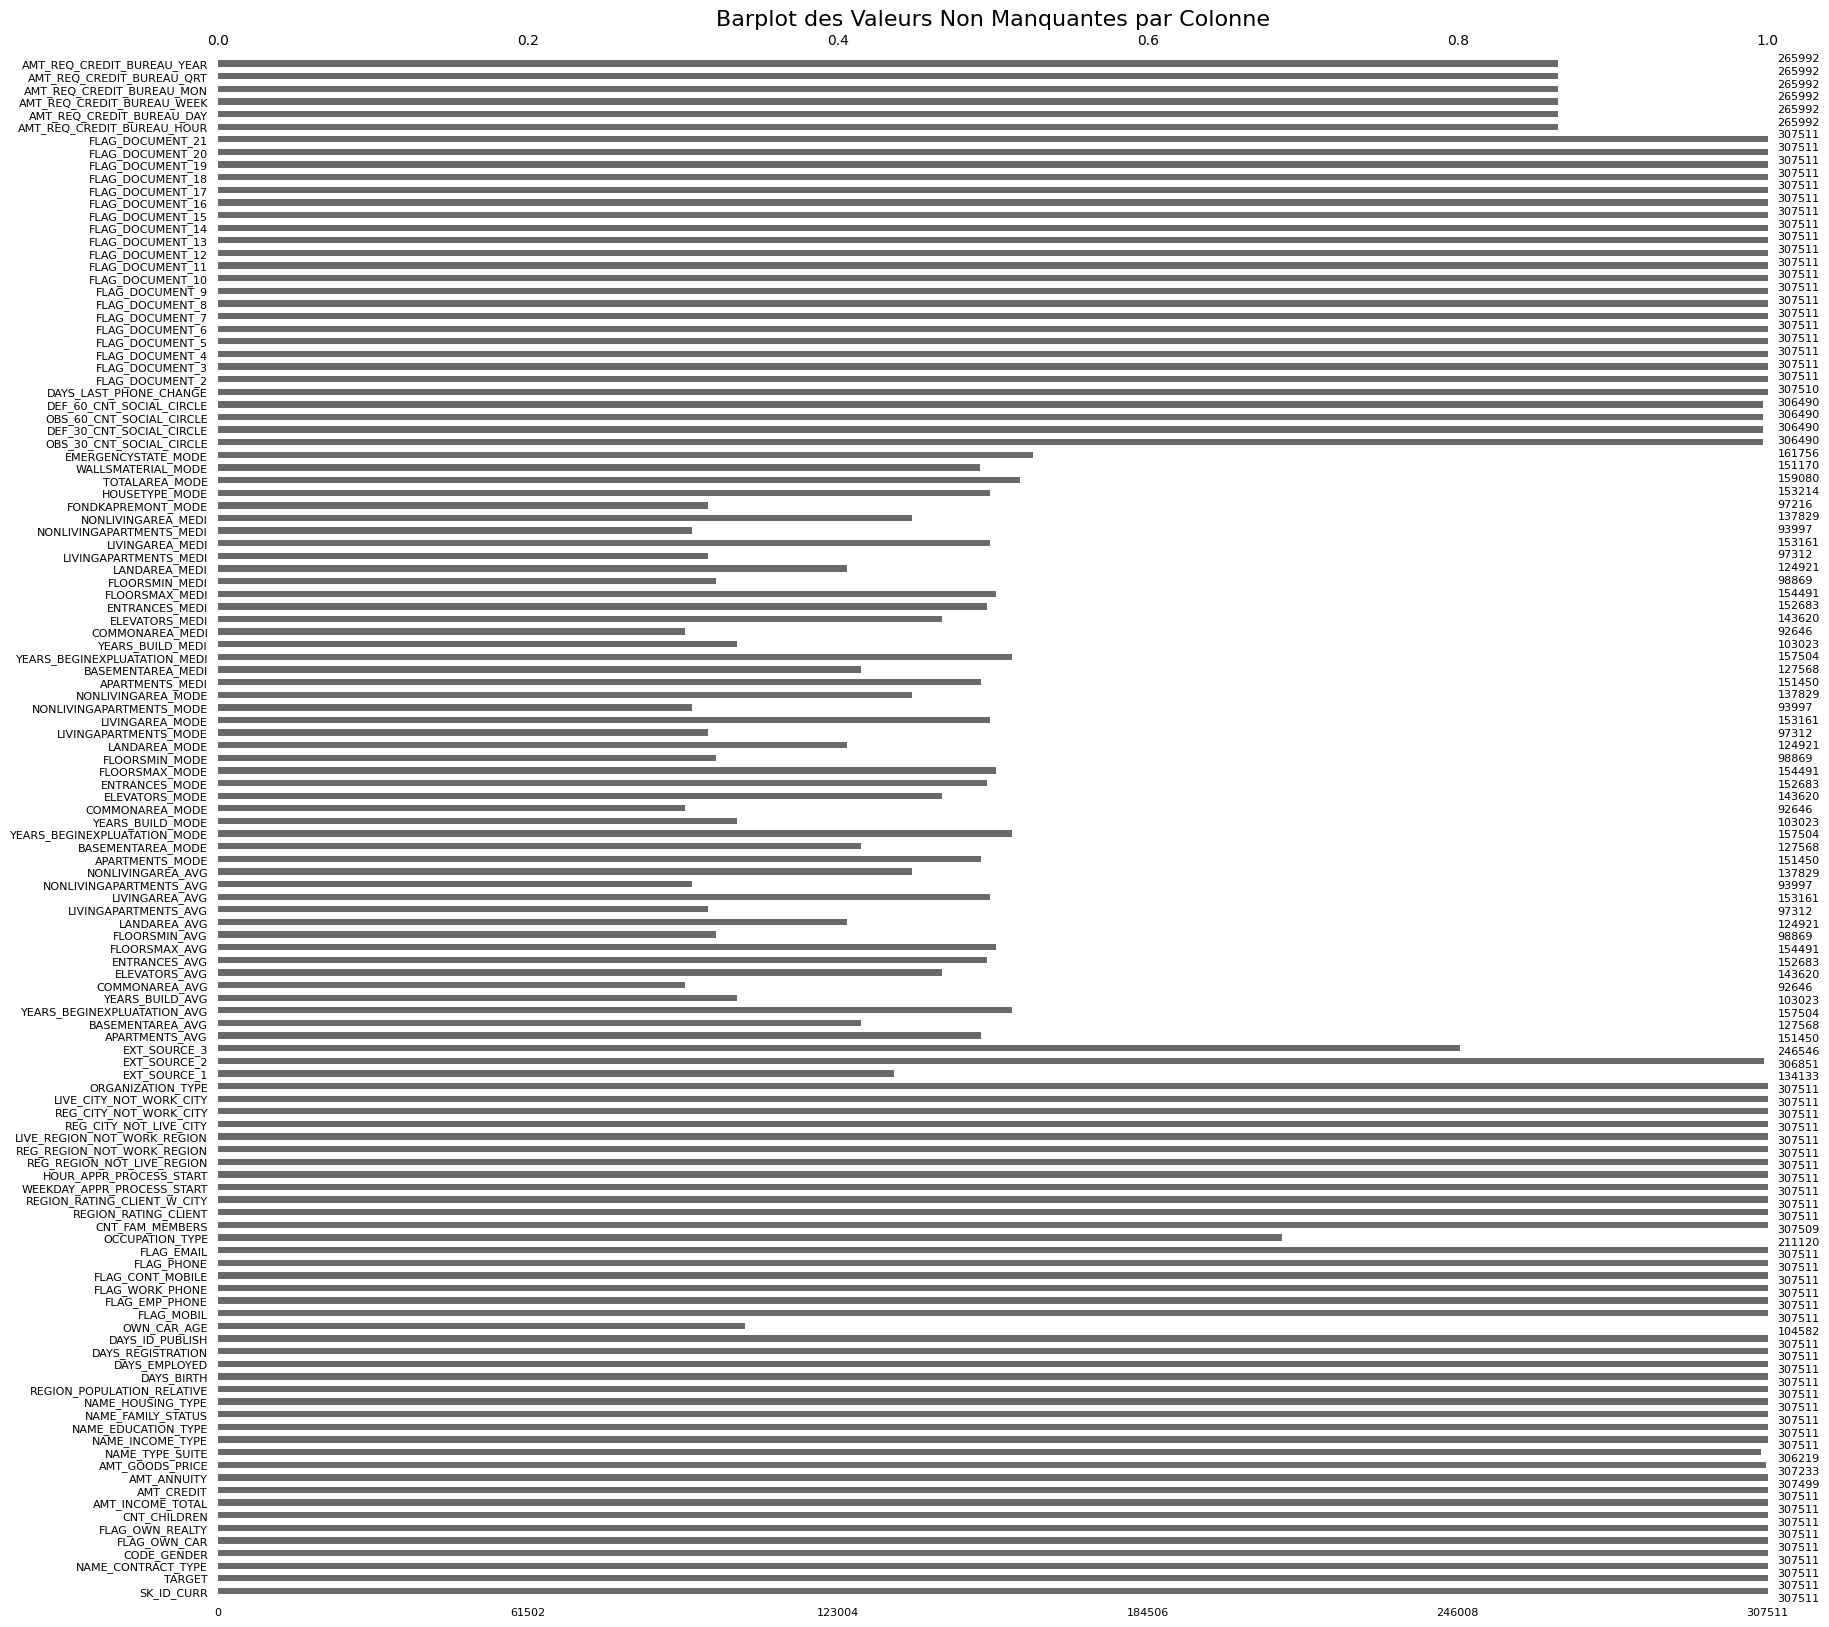



--- Types de Colonnes ---
Nombre total de colonnes : 122
Nombre de colonnes de type 'object' (catégorielles textuelles) : 16
Nombre de colonnes de type 'int64' : 41
Nombre de colonnes de type 'float64' : 65


--- Cardinalité des Variables Catégorielles (type 'object') ---


,Variable,Nombre de Valeurs Uniques
0,ORGANIZATION_TYPE,58
1,OCCUPATION_TYPE,18
2,NAME_INCOME_TYPE,8
3,NAME_TYPE_SUITE,7
4,WALLSMATERIAL_MODE,7
5,WEEKDAY_APPR_PROCESS_START,7
6,NAME_FAMILY_STATUS,6
7,NAME_HOUSING_TYPE,6
8,NAME_EDUCATION_TYPE,5
9,FONDKAPREMONT_MODE,4




--- Analyse préliminaire : Cardinalité des colonnes 'int64' (Top 10 avec faible cardinalité) ---


,Variable Int64,Nombre de Valeurs Uniques
0,TARGET,2
1,FLAG_EMP_PHONE,2
2,FLAG_MOBIL,2
3,REG_REGION_NOT_LIVE_REGION,2
4,FLAG_EMAIL,2
5,FLAG_PHONE,2
6,FLAG_CONT_MOBILE,2
7,FLAG_WORK_PHONE,2
8,FLAG_DOCUMENT_4,2
9,FLAG_DOCUMENT_3,2


In [5]:
print("Analyse des valeurs manquantes et des types de variables...\n")

# 1. Calculer le pourcentage de valeurs manquantes par colonne
print("--- Pourcentage de Valeurs Manquantes par Colonne (Top 60) ---")
missing_values = app_train.isnull().sum()
missing_percentage = (missing_values / len(app_train)) * 100
missing_stats = pd.DataFrame({'Valeurs Manquantes': missing_values, 'Pourcentage (%)': missing_percentage})
# Trier par pourcentage décroissant et afficher celles qui ont des manquants
missing_stats_sorted = missing_stats[missing_stats['Pourcentage (%)'] > 0].sort_values(by='Pourcentage (%)', ascending=False)
display(missing_stats_sorted.head(60)) # Afficher les 30 premières
print("\n")

# 2. Visualisation des valeurs manquantes avec missingno
print("--- Visualisation des Valeurs Manquantes (Matrice missingno) ---")
# Matrice : montre où se situent les NaN
msno.matrix(app_train.sample(500), figsize=(20, 8), fontsize=8) # Échantillon pour la lisibilité
plt.title('Matrice des Valeurs Manquantes (Échantillon de 500 lignes)', fontsize=16)
plt.show()
print("\n")

print("--- Visualisation des Valeurs Manquantes (Barplot missingno) ---")
# Barplot : un compte de non-NaN par colonne
msno.bar(app_train, figsize=(20, 20), fontsize=8) # Hauteur augmentée ici
plt.title('Barplot des Valeurs Non Manquantes par Colonne', fontsize=16)
plt.show()
print("\n")

# 3. Identifier les types de colonnes
print("--- Types de Colonnes ---")
print(f"Nombre total de colonnes : {len(app_train.columns)}")

object_cols = app_train.select_dtypes(include='object').columns
print(f"Nombre de colonnes de type 'object' (catégorielles textuelles) : {len(object_cols)}")
# print("Colonnes 'object':", list(object_cols)) # Décommenter pour voir la liste

int_cols = app_train.select_dtypes(include=['int64']).columns
print(f"Nombre de colonnes de type 'int64' : {len(int_cols)}")
# print("Colonnes 'int64':", list(int_cols)) # Décommenter pour voir la liste

float_cols = app_train.select_dtypes(include=['float64']).columns
print(f"Nombre de colonnes de type 'float64' : {len(float_cols)}")
# print("Colonnes 'float64':", list(float_cols)) # Décommenter pour voir la liste
print("\n")

# 4. Cardinalité des variables catégorielles (type 'object')
print("--- Cardinalité des Variables Catégorielles (type 'object') ---")
if len(object_cols) > 0:
    object_cardinality = app_train[object_cols].nunique().sort_values(ascending=False)
    display(pd.DataFrame({'Variable': object_cardinality.index, 'Nombre de Valeurs Uniques': object_cardinality.values}))
else:
    print("Aucune colonne de type 'object' trouvée.")
print("\n")

# Analyse préliminaire des int64 qui pourraient être catégorielles
print("--- Analyse préliminaire : Cardinalité des colonnes 'int64' (Top 10 avec faible cardinalité) ---")
if len(int_cols) > 0:
    int_cardinality = app_train[int_cols].nunique().sort_values()
    # Afficher celles qui ont une faible cardinalité, par ex. moins de 10 valeurs uniques
    # Cela peut indiquer des variables catégorielles codées numériquement
    potential_categorical_int = int_cardinality[int_cardinality < 10]
    if not potential_categorical_int.empty:
        display(pd.DataFrame({
            'Variable Int64': potential_categorical_int.index, 
            'Nombre de Valeurs Uniques': potential_categorical_int.values
        }))
    else:
        print("Aucune colonne 'int64' avec moins de 10 valeurs uniques trouvée (suggestion de variables catégorielles).")
else:
    print("Aucune colonne de type 'int64' trouvée.")

In [6]:
def analyze_problematic_columns(
    df_main,
    df_descriptions,
    missing_threshold_pct,
    desc_table_name_val='application_train.csv',
    desc_col_for_table_name='Table',
    desc_col_for_variable_name='Row',
    desc_col_for_description_text='Description'
):
    """
    Analyse les colonnes d'un DataFrame principal (df_main) dont le pourcentage
    de valeurs manquantes dépasse un certain seuil.

    Pour chaque colonne concernée, affiche :
    - Son nom et son type.
    - Sa description (issue de df_descriptions).
    - Un describe() si elle est numérique.
    - Ses valeurs uniques si sa cardinalité est inférieure à 60.

    Args:
        df_main (pd.DataFrame): Le DataFrame principal à analyser (ex: app_train).
        df_descriptions (pd.DataFrame): Le DataFrame contenant les descriptions des colonnes.
        missing_threshold_pct (float): Le seuil (en pourcentage, ex: 40 pour 40%)
                                       au-delà duquel une colonne est analysée.
        desc_table_name_val (str): Le nom de la table à rechercher dans df_descriptions
                                   (ex: 'application_train.csv').
        desc_col_for_table_name (str): Nom de la colonne dans df_descriptions qui contient
                                       le nom de la table.
        desc_col_for_variable_name (str): Nom de la colonne dans df_descriptions qui contient
                                          le nom de la variable/colonne.
        desc_col_for_description_text (str): Nom de la colonne dans df_descriptions qui contient
                                             le texte de la description.
    """

    if df_main is None or df_main.empty:
        print("Le DataFrame principal (df_main) est vide ou non défini.")
        return
    if df_descriptions is None or df_descriptions.empty:
        print("Le DataFrame des descriptions (df_descriptions) est vide ou non défini.")
        return

    # Vérifier que les colonnes nécessaires sont dans df_descriptions
    required_desc_cols = [desc_col_for_table_name, desc_col_for_variable_name, desc_col_for_description_text]
    if not all(col in df_descriptions.columns for col in required_desc_cols):
        print(f"Certaines colonnes requises pour les descriptions sont manquantes dans df_descriptions.")
        print(f"Colonnes attendues : {required_desc_cols}")
        print(f"Colonnes trouvées : {list(df_descriptions.columns)}")
        return

    print(f"--- Analyse des colonnes avec plus de {missing_threshold_pct}% de valeurs manquantes dans '{desc_table_name_val}' ---\n")

    missing_values = df_main.isnull().sum()
    missing_percentage = (missing_values / len(df_main)) * 100

    for column_name in df_main.columns:
        if missing_percentage[column_name] > missing_threshold_pct:
            print(f"-------------------- Colonne : {column_name} --------------------")
            print(f"Pourcentage de valeurs manquantes : {missing_percentage[column_name]:.2f}%\n")

            # 1. Type de la colonne
            col_type = df_main[column_name].dtype
            print(f"Type de données : {col_type}")

            # 2. Description de la colonne
            try:
                description_series = df_descriptions[
                    (df_descriptions[desc_col_for_variable_name] == column_name) &
                    (df_descriptions[desc_col_for_table_name] == desc_table_name_val)
                ][desc_col_for_description_text]
                
                if not description_series.empty:
                    description = description_series.iloc[0]
                    print(f"Description : {description}")
                else:
                    # Essayer de trouver la description sans le nom de la table si elle n'a pas été trouvée
                    description_series_any_table = df_descriptions[
                        df_descriptions[desc_col_for_variable_name] == column_name
                    ][desc_col_for_description_text]
                    if not description_series_any_table.empty:
                        description = description_series_any_table.iloc[0]
                        table_found = df_descriptions[
                            df_descriptions[desc_col_for_variable_name] == column_name
                        ][desc_col_for_table_name].iloc[0]
                        print(f"Description (trouvée dans table '{table_found}') : {description}")
                    else:
                        print("Description : Non trouvée.")
            except Exception as e:
                print(f"Description : Erreur lors de la récupération - {e}")
            print("") # Saut de ligne

            # 3. Describe pour les variables numériques
            if pd.api.types.is_numeric_dtype(col_type):
                print("Statistiques descriptives (describe()) :")
                display(df_main[column_name].describe())
                print("") # Saut de ligne

            # 4. Valeurs uniques pour les variables à faible/moyenne cardinalité
            cardinality = df_main[column_name].nunique(dropna=False) # dropna=False pour inclure NaN dans le compte des uniques si pertinent
            print(f"Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : {cardinality}")
            if cardinality < 70 :
                print("Valeurs uniques :")
                try:
                    unique_vals = df_main[column_name].value_counts(dropna=False).sort_index() # dropna=False pour voir le compte des NaN
                    display(unique_vals)
                except Exception as e:
                    # Certaines colonnes avec des types mixtes peuvent poser problème à value_counts().
                    # On tente alors un .unique() simple.
                    print(f"  Impossible d'afficher value_counts (erreur: {e}). Tentative avec .unique():")
                    try:
                        display(df_main[column_name].unique())
                    except Exception as e_unique:
                         print(f"  Échec de .unique() également (erreur: {e_unique}).")

            else:
                print("Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.")
            
            print("\n") # Séparateur pour la prochaine colonne

    print("--- Fin de l'analyse ---")

# --- Exemple d'utilisation ---
# Assurez-vous que app_train et col_descriptions sont chargés avant d'appeler la fonction.
# Par exemple:
# if 'app_train' in globals() and 'col_descriptions' in globals():
#     # Adaptez les noms des colonnes si nécessaire pour votre fichier col_descriptions.csv
#     # Colonnes typiques pour HomeCredit_columns_description.csv:
#     # table_col = 'Table'
#     # var_col = 'Row'
#     # desc_col = 'Description'
# 
analyze_problematic_columns(
    df_main=app_train,
    df_descriptions=col_descriptions,
    missing_threshold_pct=40,  # Par exemple, analyser les colonnes avec plus de 40% de NaN
    desc_table_name_val='application_{train_test}.csv', # Table spécifique à chercher
    desc_col_for_table_name='Table', # Nom de la colonne 'Table' dans col_descriptions
    desc_col_for_variable_name='Row',  # Nom de la colonne 'Row' (variable) dans col_descriptions
    desc_col_for_description_text='Description' # Nom de la colonne 'Description'
)
# else:
#     print("Veuillez charger les DataFrames 'app_train' et 'col_descriptions' avant d'exécuter l'exemple.")

--- Analyse des colonnes avec plus de 40% de valeurs manquantes dans 'application_{train_test}.csv' ---

-------------------- Colonne : OWN_CAR_AGE --------------------
Pourcentage de valeurs manquantes : 65.99%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Age of client's car

Statistiques descriptives (describe()) :


count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 63
Valeurs uniques :


OWN_CAR_AGE
0.0       2134
1.0       5280
2.0       5852
3.0       6370
4.0       5557
5.0       3595
6.0       6382
7.0       7424
8.0       5887
9.0       5020
10.0      4806
11.0      4161
12.0      4257
13.0      4566
14.0      4594
15.0      3580
16.0      3355
17.0      2899
18.0      2418
19.0      1864
20.0      1527
21.0      1462
22.0      1250
23.0      1067
24.0      1150
25.0       865
26.0       580
27.0       483
28.0       542
29.0       397
30.0       326
31.0       267
32.0       208
33.0       132
34.0       183
35.0       157
36.0       124
37.0        75
38.0        97
39.0        78
40.0        85
41.0        58
42.0        42
43.0        19
44.0        21
45.0        11
46.0         5
47.0         1
48.0         1
49.0         6
50.0         1
51.0         3
52.0         1
54.0        12
55.0         4
56.0         1
57.0         1
63.0         2
64.0      2443
65.0       891
69.0         1
91.0         2
NaN     202929
Name: count, dtype: int64



-------------------- Colonne : EXT_SOURCE_1 --------------------
Pourcentage de valeurs manquantes : 56.38%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized score from external data source

Statistiques descriptives (describe()) :


count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 114585
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : APARTMENTS_AVG --------------------
Pourcentage de valeurs manquantes : 50.75%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    151450.00000
mean          0.11744
std           0.10824
min           0.00000
25%           0.05770
50%           0.08760
75%           0.14850
max           1.00000
Name: APARTMENTS_AVG, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 2340
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : BASEMENTAREA_AVG --------------------
Pourcentage de valeurs manquantes : 58.52%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    127568.000000
mean          0.088442
std           0.082438
min           0.000000
25%           0.044200
50%           0.076300
75%           0.112200
max           1.000000
Name: BASEMENTAREA_AVG, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 3781
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : YEARS_BEGINEXPLUATATION_AVG --------------------
Pourcentage de valeurs manquantes : 48.78%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 286
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : YEARS_BUILD_AVG --------------------
Pourcentage de valeurs manquantes : 66.50%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    103023.000000
mean          0.752471
std           0.113280
min           0.000000
25%           0.687200
50%           0.755200
75%           0.823200
max           1.000000
Name: YEARS_BUILD_AVG, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 150
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : COMMONAREA_AVG --------------------
Pourcentage de valeurs manquantes : 69.87%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    92646.000000
mean         0.044621
std          0.076036
min          0.000000
25%          0.007800
50%          0.021100
75%          0.051500
max          1.000000
Name: COMMONAREA_AVG, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 3182
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : ELEVATORS_AVG --------------------
Pourcentage de valeurs manquantes : 53.30%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    143620.000000
mean          0.078942
std           0.134576
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_AVG, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 258
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : ENTRANCES_AVG --------------------
Pourcentage de valeurs manquantes : 50.35%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    152683.000000
mean          0.149725
std           0.100049
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_AVG, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 286
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : FLOORSMAX_AVG --------------------
Pourcentage de valeurs manquantes : 49.76%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 404
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : FLOORSMIN_AVG --------------------
Pourcentage de valeurs manquantes : 67.85%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    98869.000000
mean         0.231894
std          0.161380
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_AVG, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 306
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : LANDAREA_AVG --------------------
Pourcentage de valeurs manquantes : 59.38%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    124921.000000
mean          0.066333
std           0.081184
min           0.000000
25%           0.018700
50%           0.048100
75%           0.085600
max           1.000000
Name: LANDAREA_AVG, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 3528
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : LIVINGAPARTMENTS_AVG --------------------
Pourcentage de valeurs manquantes : 68.35%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    97312.000000
mean         0.100775
std          0.092576
min          0.000000
25%          0.050400
50%          0.075600
75%          0.121000
max          1.000000
Name: LIVINGAPARTMENTS_AVG, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 1869
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : LIVINGAREA_AVG --------------------
Pourcentage de valeurs manquantes : 50.19%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    153161.000000
mean          0.107399
std           0.110565
min           0.000000
25%           0.045300
50%           0.074500
75%           0.129900
max           1.000000
Name: LIVINGAREA_AVG, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 5200
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : NONLIVINGAPARTMENTS_AVG --------------------
Pourcentage de valeurs manquantes : 69.43%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    93997.000000
mean         0.008809
std          0.047732
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_AVG, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 387
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : NONLIVINGAREA_AVG --------------------
Pourcentage de valeurs manquantes : 55.18%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    137829.000000
mean          0.028358
std           0.069523
min           0.000000
25%           0.000000
50%           0.003600
75%           0.027700
max           1.000000
Name: NONLIVINGAREA_AVG, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 3291
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : APARTMENTS_MODE --------------------
Pourcentage de valeurs manquantes : 50.75%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    151450.000000
mean          0.114231
std           0.107936
min           0.000000
25%           0.052500
50%           0.084000
75%           0.143900
max           1.000000
Name: APARTMENTS_MODE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 761
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : BASEMENTAREA_MODE --------------------
Pourcentage de valeurs manquantes : 58.52%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    127568.000000
mean          0.087543
std           0.084307
min           0.000000
25%           0.040700
50%           0.074600
75%           0.112400
max           1.000000
Name: BASEMENTAREA_MODE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 3842
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : YEARS_BEGINEXPLUATATION_MODE --------------------
Pourcentage de valeurs manquantes : 48.78%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 222
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : YEARS_BUILD_MODE --------------------
Pourcentage de valeurs manquantes : 66.50%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    103023.000000
mean          0.759637
std           0.110111
min           0.000000
25%           0.699400
50%           0.764800
75%           0.823600
max           1.000000
Name: YEARS_BUILD_MODE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 155
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : COMMONAREA_MODE --------------------
Pourcentage de valeurs manquantes : 69.87%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    92646.000000
mean         0.042553
std          0.074445
min          0.000000
25%          0.007200
50%          0.019000
75%          0.049000
max          1.000000
Name: COMMONAREA_MODE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 3129
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : ELEVATORS_MODE --------------------
Pourcentage de valeurs manquantes : 53.30%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    143620.000000
mean          0.074490
std           0.132256
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120800
max           1.000000
Name: ELEVATORS_MODE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 27
Valeurs uniques :


ELEVATORS_MODE
0.0000     89498
0.0403      4876
0.0806     11629
0.1208      5734
0.1611      9675
0.2014      3962
0.2417      6379
0.2820      2135
0.3222      2887
0.3625      1308
0.4028      1554
0.4431       628
0.4834      1094
0.5236       253
0.5639       491
0.6042       226
0.6445       447
0.6848        99
0.7250       219
0.7653        38
0.8056       137
0.8459        34
0.8862        66
0.9264        20
0.9667        87
1.0000       144
NaN       163891
Name: count, dtype: int64



-------------------- Colonne : ENTRANCES_MODE --------------------
Pourcentage de valeurs manquantes : 50.35%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    152683.000000
mean          0.145193
std           0.100977
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_MODE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 31
Valeurs uniques :


ENTRANCES_MODE
0.0000       387
0.0345     19428
0.0690     26704
0.1034     20533
0.1379     36041
0.1724      8986
0.2069     19678
0.2414      4013
0.2759      8036
0.3103      2014
0.3448      2046
0.3793       977
0.4138      1212
0.4483       431
0.4828       500
0.5172       301
0.5517       351
0.5862       186
0.6207       241
0.6552        65
0.6897       116
0.7241        44
0.7586        48
0.7931        39
0.8276        42
0.8621        14
0.8966        52
0.9310        21
0.9655        25
1.0000       152
NaN       154828
Name: count, dtype: int64



-------------------- Colonne : FLOORSMAX_MODE --------------------
Pourcentage de valeurs manquantes : 49.76%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 26
Valeurs uniques :


FLOORSMAX_MODE
0.0000      3415
0.0417     15616
0.0833      6785
0.1250      7267
0.1667     65550
0.2083      1505
0.2500       572
0.2917       511
0.3333     34373
0.3750      8321
0.4167       236
0.4583      3216
0.5000       184
0.5417      1836
0.5833       391
0.6250      2075
0.6667      1710
0.7083       199
0.7500       124
0.7917        58
0.8333        22
0.8750       229
0.9167        38
0.9583        94
1.0000       164
NaN       153020
Name: count, dtype: int64



-------------------- Colonne : FLOORSMIN_MODE --------------------
Pourcentage de valeurs manquantes : 67.85%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    98869.000000
mean         0.228058
std          0.161160
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_MODE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 26
Valeurs uniques :


FLOORSMIN_MODE
0.0000      2517
0.0417     18917
0.0833      5349
0.1250      3170
0.1667      3636
0.2083     34403
0.2500       772
0.2917       359
0.3333       320
0.3750     19042
0.4167      4105
0.4583       105
0.5000      1889
0.5417       140
0.5833      1051
0.6250       207
0.6667      1264
0.7083      1143
0.7500        99
0.7917        61
0.8333        22
0.8750         9
0.9167       131
0.9583        17
1.0000       141
NaN       208642
Name: count, dtype: int64



-------------------- Colonne : LANDAREA_MODE --------------------
Pourcentage de valeurs manquantes : 59.38%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    124921.000000
mean          0.064958
std           0.081750
min           0.000000
25%           0.016600
50%           0.045800
75%           0.084100
max           1.000000
Name: LANDAREA_MODE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 3564
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : LIVINGAPARTMENTS_MODE --------------------
Pourcentage de valeurs manquantes : 68.35%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    97312.000000
mean         0.105645
std          0.097880
min          0.000000
25%          0.054200
50%          0.077100
75%          0.131300
max          1.000000
Name: LIVINGAPARTMENTS_MODE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 737
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : LIVINGAREA_MODE --------------------
Pourcentage de valeurs manquantes : 50.19%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    153161.000000
mean          0.105975
std           0.111845
min           0.000000
25%           0.042700
50%           0.073100
75%           0.125200
max           1.000000
Name: LIVINGAREA_MODE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 5302
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : NONLIVINGAPARTMENTS_MODE --------------------
Pourcentage de valeurs manquantes : 69.43%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    93997.000000
mean         0.008076
std          0.046276
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_MODE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 168
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : NONLIVINGAREA_MODE --------------------
Pourcentage de valeurs manquantes : 55.18%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    137829.000000
mean          0.027022
std           0.070254
min           0.000000
25%           0.000000
50%           0.001100
75%           0.023100
max           1.000000
Name: NONLIVINGAREA_MODE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 3328
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : APARTMENTS_MEDI --------------------
Pourcentage de valeurs manquantes : 50.75%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    151450.000000
mean          0.117850
std           0.109076
min           0.000000
25%           0.058300
50%           0.086400
75%           0.148900
max           1.000000
Name: APARTMENTS_MEDI, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 1149
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : BASEMENTAREA_MEDI --------------------
Pourcentage de valeurs manquantes : 58.52%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    127568.000000
mean          0.087955
std           0.082179
min           0.000000
25%           0.043700
50%           0.075800
75%           0.111600
max           1.000000
Name: BASEMENTAREA_MEDI, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 3773
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : YEARS_BEGINEXPLUATATION_MEDI --------------------
Pourcentage de valeurs manquantes : 48.78%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 246
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : YEARS_BUILD_MEDI --------------------
Pourcentage de valeurs manquantes : 66.50%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    103023.000000
mean          0.755746
std           0.112066
min           0.000000
25%           0.691400
50%           0.758500
75%           0.825600
max           1.000000
Name: YEARS_BUILD_MEDI, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 152
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : COMMONAREA_MEDI --------------------
Pourcentage de valeurs manquantes : 69.87%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    92646.000000
mean         0.044595
std          0.076144
min          0.000000
25%          0.007900
50%          0.020800
75%          0.051300
max          1.000000
Name: COMMONAREA_MEDI, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 3203
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : ELEVATORS_MEDI --------------------
Pourcentage de valeurs manquantes : 53.30%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    143620.000000
mean          0.078078
std           0.134467
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_MEDI, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 47
Valeurs uniques :


ELEVATORS_MEDI
0.00     87026
0.02       368
0.04      4852
0.06       388
0.08     10832
0.10       543
0.12      5946
0.14       388
0.16      9278
0.18       280
0.20      4162
0.22       226
0.24      6392
0.26       145
0.28      2317
0.30        94
0.32      2937
0.34        80
0.36      1405
0.38        62
0.40      1604
0.42        32
0.44       715
0.46        23
0.48      1096
0.50        16
0.52       290
0.54        10
0.56       493
0.58         6
0.60       248
0.62         5
0.64       454
0.66         5
0.68       112
0.72       224
0.74         6
0.76        45
0.78        10
0.80       140
0.84        32
0.88        68
0.90         6
0.92        20
0.96        81
1.00       158
NaN     163891
Name: count, dtype: int64



-------------------- Colonne : ENTRANCES_MEDI --------------------
Pourcentage de valeurs manquantes : 50.35%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    152683.000000
mean          0.149213
std           0.100368
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_MEDI, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 47
Valeurs uniques :


ENTRANCES_MEDI
0.0000       329
0.0172         7
0.0345     16150
0.0517       611
0.0690     24193
0.0862      1352
0.1034     20492
0.1207      1228
0.1379     35535
0.1552       788
0.1724      9566
0.1897       554
0.2069     19750
0.2241       278
0.2414      4318
0.2586       169
0.2759      8048
0.2931       106
0.3103      2086
0.3276        59
0.3448      2108
0.3621        39
0.3793      1010
0.3966        14
0.4138      1198
0.4310        31
0.4483       438
0.4655        12
0.4828       503
0.5000         1
0.5172       304
0.5517       352
0.5690         4
0.5862       187
0.6207       241
0.6552        68
0.6897       116
0.7241        44
0.7586        48
0.7931        39
0.8276        42
0.8621        14
0.8966        52
0.9310        21
0.9655        25
1.0000       153
NaN       154828
Name: count, dtype: int64



-------------------- Colonne : FLOORSMAX_MEDI --------------------
Pourcentage de valeurs manquantes : 49.76%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 50
Valeurs uniques :


FLOORSMAX_MEDI
0.0000      2995
0.0208       126
0.0417     14832
0.0625       132
0.0833      6657
0.1042       460
0.1250      7079
0.1458       321
0.1667     63607
0.1875       245
0.2083      1544
0.2292       128
0.2500      1684
0.2708       291
0.2917       567
0.3125       131
0.3333     33279
0.3542       459
0.3750      8207
0.3958       346
0.4167       329
0.4375       138
0.4583      3089
0.4792       220
0.5000       312
0.5208        47
0.5417      1860
0.5625        46
0.5833       439
0.6042       115
0.6250      2042
0.6458        30
0.6667      1675
0.6875        24
0.7083       204
0.7292        10
0.7500       136
0.7708        27
0.7917        61
0.8125        23
0.8333        39
0.8542         3
0.8750       223
0.8958         2
0.9167        37
0.9375         4
0.9583        95
0.9792         1
1.0000       170
NaN       153020
Name: count, dtype: int64



-------------------- Colonne : FLOORSMIN_MEDI --------------------
Pourcentage de valeurs manquantes : 67.85%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    98869.000000
mean         0.231625
std          0.161934
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_MEDI, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 48
Valeurs uniques :


FLOORSMIN_MEDI
0.0000      2351
0.0208        50
0.0417     18090
0.0625        51
0.0833      5131
0.1042       106
0.1250      3373
0.1458       180
0.1667      3570
0.1875       159
0.2083     33737
0.2292       121
0.2500       779
0.2708       104
0.2917       852
0.3125       148
0.3333       341
0.3542        79
0.3750     18538
0.3958       205
0.4167      4068
0.4375       186
0.4583       154
0.4792        61
0.5000      1835
0.5208        81
0.5417       212
0.5625        19
0.5833      1057
0.6042        16
0.6250       235
0.6458        49
0.6667      1261
0.6875         9
0.7083      1108
0.7292        10
0.7500       116
0.7708         7
0.7917        64
0.8125        12
0.8333        27
0.8542         5
0.8750        16
0.9167       130
0.9583        14
0.9792         5
1.0000       147
NaN       208642
Name: count, dtype: int64



-------------------- Colonne : LANDAREA_MEDI --------------------
Pourcentage de valeurs manquantes : 59.38%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    124921.000000
mean          0.067169
std           0.082167
min           0.000000
25%           0.018700
50%           0.048700
75%           0.086800
max           1.000000
Name: LANDAREA_MEDI, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 3561
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : LIVINGAPARTMENTS_MEDI --------------------
Pourcentage de valeurs manquantes : 68.35%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    97312.000000
mean         0.101954
std          0.093642
min          0.000000
25%          0.051300
50%          0.076100
75%          0.123100
max          1.000000
Name: LIVINGAPARTMENTS_MEDI, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 1098
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : LIVINGAREA_MEDI --------------------
Pourcentage de valeurs manquantes : 50.19%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    153161.000000
mean          0.108607
std           0.112260
min           0.000000
25%           0.045700
50%           0.074900
75%           0.130300
max           1.000000
Name: LIVINGAREA_MEDI, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 5282
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : NONLIVINGAPARTMENTS_MEDI --------------------
Pourcentage de valeurs manquantes : 69.43%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    93997.000000
mean         0.008651
std          0.047415
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_MEDI, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 215
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : NONLIVINGAREA_MEDI --------------------
Pourcentage de valeurs manquantes : 55.18%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    137829.000000
mean          0.028236
std           0.070166
min           0.000000
25%           0.000000
50%           0.003100
75%           0.026600
max           1.000000
Name: NONLIVINGAREA_MEDI, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 3324
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : FONDKAPREMONT_MODE --------------------
Pourcentage de valeurs manquantes : 68.39%

Type de données : object
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 5
Valeurs uniques :


FONDKAPREMONT_MODE
not specified              5687
org spec account           5619
reg oper account          73830
reg oper spec account     12080
NaN                      210295
Name: count, dtype: int64



-------------------- Colonne : HOUSETYPE_MODE --------------------
Pourcentage de valeurs manquantes : 50.18%

Type de données : object
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 4
Valeurs uniques :


HOUSETYPE_MODE
block of flats      150503
specific housing      1499
terraced house        1212
NaN                 154297
Name: count, dtype: int64



-------------------- Colonne : TOTALAREA_MODE --------------------
Pourcentage de valeurs manquantes : 48.27%

Type de données : float64
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Statistiques descriptives (describe()) :


count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64


Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 5117
Cardinalité trop élevée (>70) pour afficher toutes les valeurs uniques de manière concise.


-------------------- Colonne : WALLSMATERIAL_MODE --------------------
Pourcentage de valeurs manquantes : 50.84%

Type de données : object
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 8
Valeurs uniques :


WALLSMATERIAL_MODE
Block             9253
Mixed             2296
Monolithic        1779
Others            1625
Panel            66040
Stone, brick     64815
Wooden            5362
NaN             156341
Name: count, dtype: int64



-------------------- Colonne : EMERGENCYSTATE_MODE --------------------
Pourcentage de valeurs manquantes : 47.40%

Type de données : object
Description (trouvée dans table 'application_{train|test}.csv') : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Cardinalité (nombre de valeurs uniques, NaN inclus si présent) : 3
Valeurs uniques :


EMERGENCYSTATE_MODE
No     159428
Yes      2328
NaN    145755
Name: count, dtype: int64



--- Fin de l'analyse ---


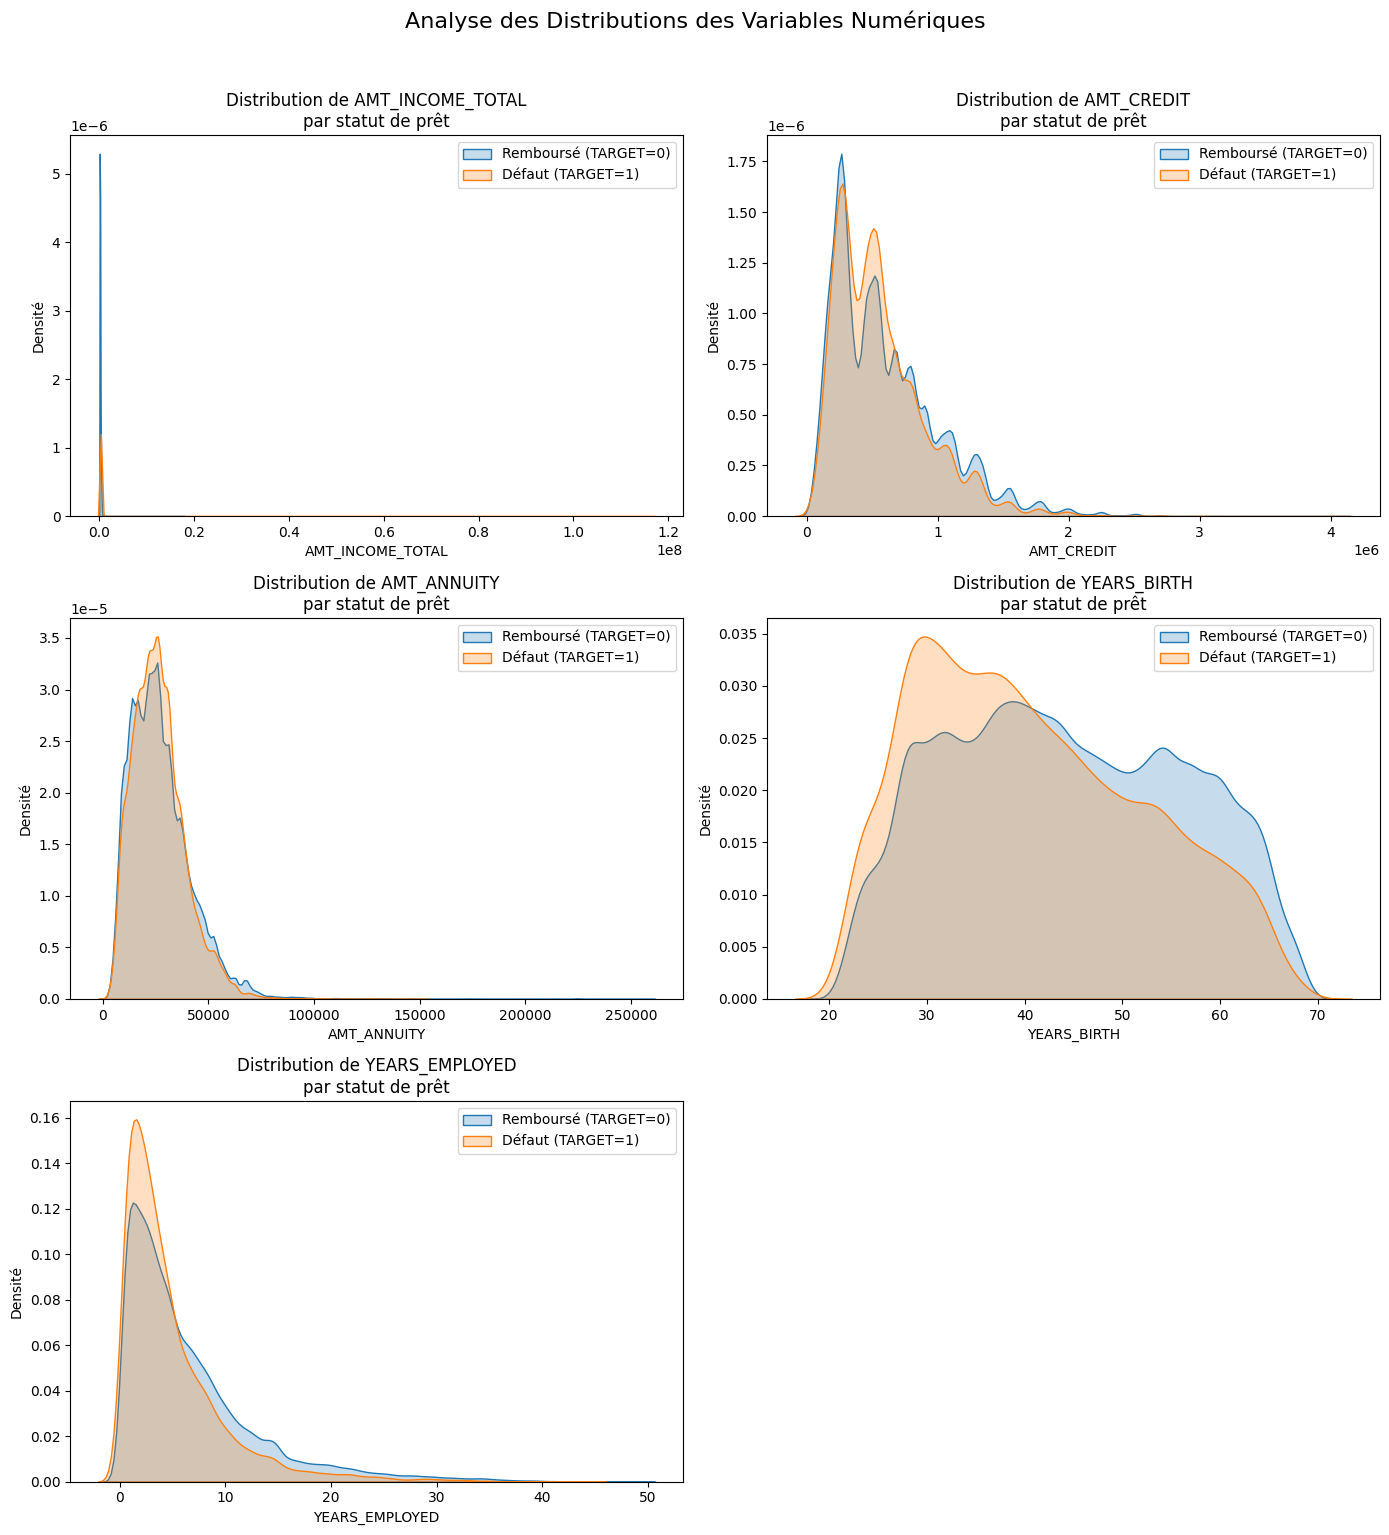

In [7]:
# print("Visualisation de la distribution de variables numériques clés par rapport à TARGET...\n")

# Créer une copie pour éviter les avertissements de modification
app_train_viz = app_train.copy()

# --- Transformations pour la visualisation ---

# 1. Convertir DAYS_BIRTH en années
app_train_viz['YEARS_BIRTH'] = app_train_viz['DAYS_BIRTH'] / -365

# 2. Traiter l'anomalie dans DAYS_EMPLOYED et convertir en années
# La valeur 365243 est une anomalie. Nous la remplaçons par NaN pour la visualisation.
app_train_viz['DAYS_EMPLOYED_ANOM'] = app_train_viz['DAYS_EMPLOYED'] == 365243
app_train_viz['DAYS_EMPLOYED'] = app_train_viz['DAYS_EMPLOYED'].replace({365243: np.nan})
app_train_viz['YEARS_EMPLOYED'] = app_train_viz['DAYS_EMPLOYED'] / -365

# Liste des variables à visualiser
# Nous utilisons les versions transformées en années pour l'âge et l'ancienneté
variables_to_plot = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'YEARS_BIRTH',
    'YEARS_EMPLOYED'
]

# Création de la figure pour les graphiques
# Nous utilisons 3 lignes et 2 colonnes pour un affichage aéré
fig, axes = plt.subplots(3, 2, figsize=(14, 15))
axes = axes.flatten() # Aplatir la grille d'axes pour itérer facilement

for i, var_name in enumerate(variables_to_plot):
    ax = axes[i]
    
    # Filtrer les valeurs NaN pour la visualisation
    subset_0 = app_train_viz.loc[app_train_viz['TARGET'] == 0, var_name].dropna()
    subset_1 = app_train_viz.loc[app_train_viz['TARGET'] == 1, var_name].dropna()

    # Graphique de densité (KDE) pour chaque classe de TARGET
    sns.kdeplot(subset_0, ax=ax, label='Remboursé (TARGET=0)', fill=True)
    sns.kdeplot(subset_1, ax=ax, label='Défaut (TARGET=1)', fill=True)
    
    ax.set_title(f'Distribution de {var_name}\npar statut de prêt', fontsize=12)
    ax.set_xlabel(var_name, fontsize=10)
    ax.set_ylabel('Densité', fontsize=10)
    ax.legend()
    
# Masquer le dernier axe s'il n'est pas utilisé
if len(variables_to_plot) < len(axes):
    for j in range(len(variables_to_plot), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle('Analyse des Distributions des Variables Numériques', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Analyse approfondie : revenus et variables catégorielles...

--- Analyse du Revenu Total (AMT_INCOME_TOTAL) ---


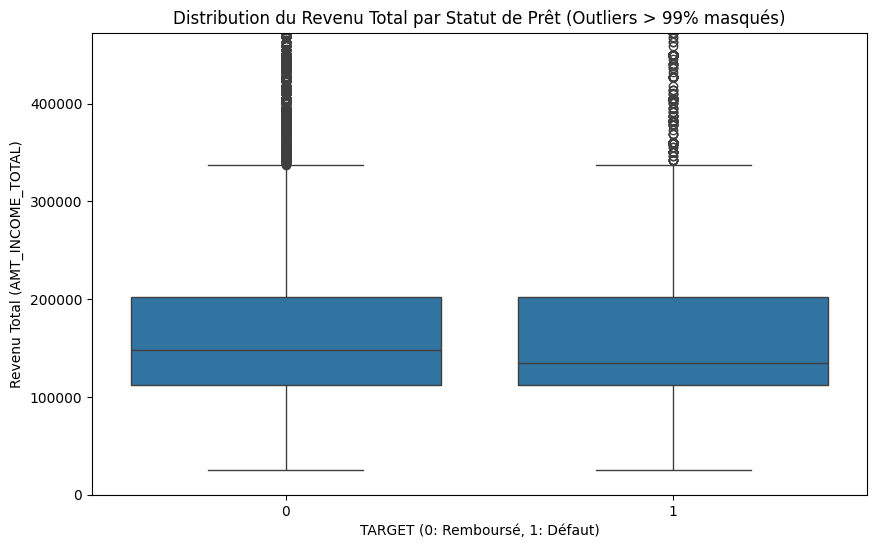

Observation : Le boxplot montre que la médiane des revenus pour les deux groupes est assez similaire, bien que la distribution puisse varier.

Analyse du taux de défaut pour les variables catégorielles clés...



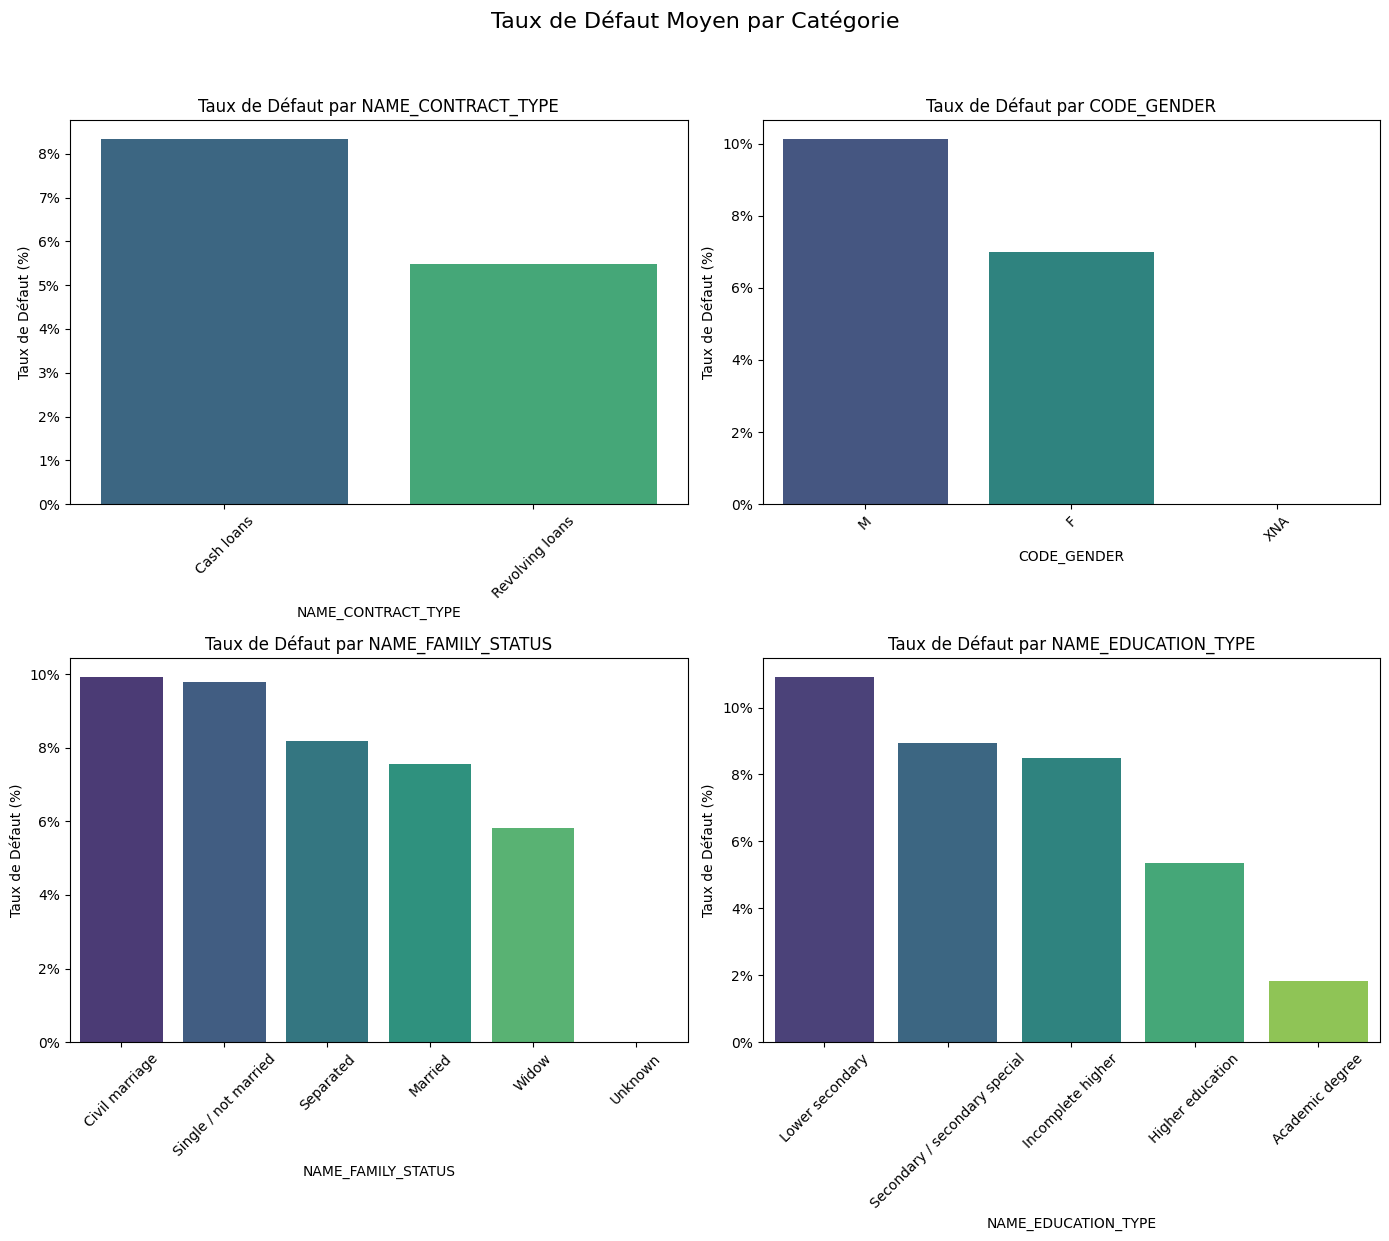

In [8]:
print("Analyse approfondie : revenus et variables catégorielles...\n")
app_train_viz = app_train.copy() # Utiliser une copie pour les visualisations

# --- 1. Amélioration de la visualisation de AMT_INCOME_TOTAL ---
print("--- Analyse du Revenu Total (AMT_INCOME_TOTAL) ---")

# Création d'un boxplot pour mieux voir les distributions et outliers
plt.figure(figsize=(10, 6))

# On limite l'axe des ordonnées au 99ème percentile pour une meilleure lisibilité
income_limit = app_train_viz['AMT_INCOME_TOTAL'].quantile(0.99)

sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train_viz)
plt.ylim(0, income_limit) # Appliquer la limite
plt.title('Distribution du Revenu Total par Statut de Prêt (Outliers > 99% masqués)')
plt.xlabel('TARGET (0: Remboursé, 1: Défaut)')
plt.ylabel('Revenu Total (AMT_INCOME_TOTAL)')
plt.show()
plt.close()
print("Observation : Le boxplot montre que la médiane des revenus pour les deux groupes est assez similaire, bien que la distribution puisse varier.\n")

print("Analyse du taux de défaut pour les variables catégorielles clés...\n")
app_train_viz = app_train.copy() # Utiliser une copie

# Liste des variables catégorielles à analyser
categorical_vars = [
    'NAME_CONTRACT_TYPE', # Type de contrat
    'CODE_GENDER',        # Genre
    'NAME_FAMILY_STATUS', # Situation familiale
    'NAME_EDUCATION_TYPE' # Niveau d'éducation
]

# Création de la figure pour les graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, var_name in enumerate(categorical_vars):
    ax = axes[i]
    
    # 1. Calculer le taux de défaut pour chaque catégorie
    # La moyenne de la colonne TARGET (0/1) correspond directement au taux de 1 (défaut)
    default_rates = app_train_viz.groupby(var_name)['TARGET'].mean().sort_values(ascending=False)
    
    # 2. Créer le barplot avec les taux calculés et ordonnés
    # Ligne corrigée pour éviter le FutureWarning de Seaborn
    sns.barplot(x=default_rates.index, 
                y=default_rates.values, 
                ax=ax, 
                hue=default_rates.index, # Assignation de x à hue
                palette='viridis', 
                legend=False)          # Désactivation de la légende
    
    ax.set_title(f'Taux de Défaut par {var_name}', fontsize=12)
    ax.set_xlabel(var_name, fontsize=10)
    ax.set_ylabel('Taux de Défaut (%)', fontsize=10)
    ax.tick_params(axis='x', rotation=45) # Rotation des étiquettes si elles sont longues
    
    # Mettre en forme l'axe Y en pourcentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

plt.suptitle('Taux de Défaut Moyen par Catégorie', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()
plt.close()

--- Informations Générales sur bureau.csv ---
Dimensions du DataFrame bureau_df : (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


--- Distribution de la variable CREDIT_ACTIVE ---
CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold        

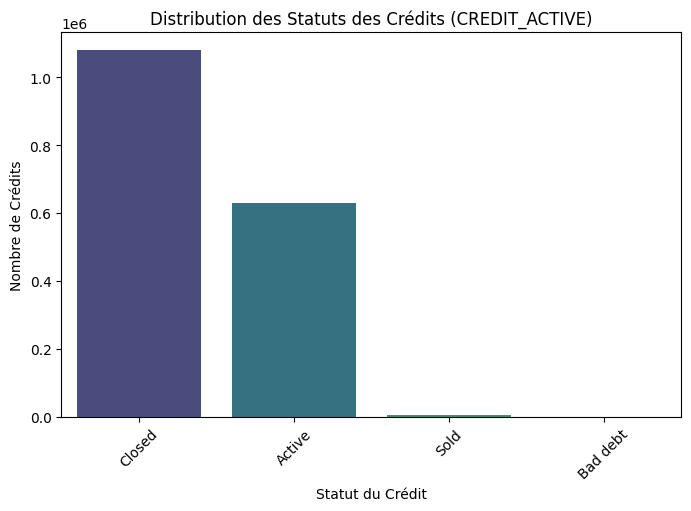



--- Distribution de la variable CREDIT_TYPE (Top 10) ---
Top 10 des types de crédit:
CREDIT_TYPE
Consumer credit                           1251615
Credit card                                402195
Car loan                                    27690
Mortgage                                    18391
Microloan                                   12413
Loan for business development                1975
Another type of loan                         1017
Unknown type of loan                          555
Loan for working capital replenishment        469
Cash loan (non-earmarked)                      56
Name: count, dtype: int64


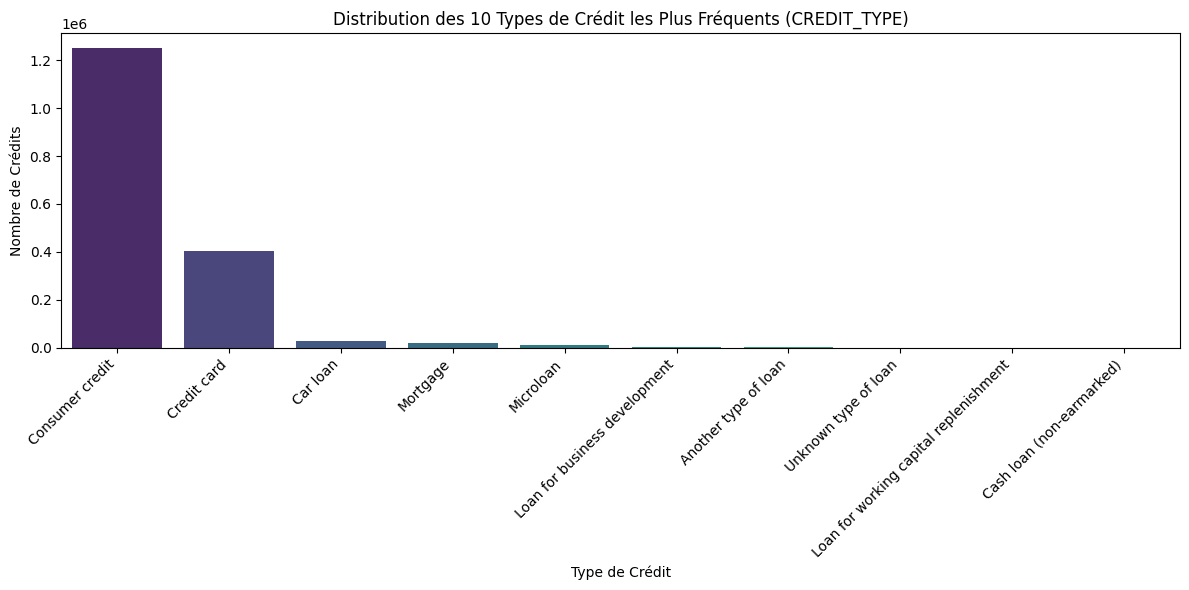



Note : Le fichier bureau.csv est lié au fichier bureau_balance.csv,
qui donne des détails mensuels sur certains de ces crédits. Nous pourrons l'explorer ensuite.


In [9]:
print("--- Informations Générales sur bureau.csv ---")
print(f"Dimensions du DataFrame bureau_df : {bureau_df.shape}")
display(bureau_df.head())
print("\n")
bureau_df.info()
print("\n")

# --- Analyse de CREDIT_ACTIVE ---
print("--- Distribution de la variable CREDIT_ACTIVE ---")
credit_active_counts = bureau_df['CREDIT_ACTIVE'].value_counts(dropna=False)
print(credit_active_counts)

plt.figure(figsize=(8, 5))
# Ligne corrigée pour éviter le FutureWarning
sns.barplot(x=credit_active_counts.index, 
            y=credit_active_counts.values, 
            hue=credit_active_counts.index, # Assignation de x à hue
            palette="viridis",
            legend=False)                  # Désactivation de la légende
plt.title('Distribution des Statuts des Crédits (CREDIT_ACTIVE)')
plt.xlabel('Statut du Crédit')
plt.ylabel('Nombre de Crédits')
plt.xticks(rotation=45)
plt.show()
print("\n")

# --- Analyse de CREDIT_TYPE ---
print("--- Distribution de la variable CREDIT_TYPE (Top 10) ---")
credit_type_counts = bureau_df['CREDIT_TYPE'].value_counts(dropna=False)
print("Top 10 des types de crédit:")
print(credit_type_counts.head(10)) # Afficher les 10 plus fréquents

plt.figure(figsize=(12, 6))
# Pour la lisibilité, on peut se limiter aux N types les plus fréquents
top_n = 10
sns.barplot(x=credit_type_counts.head(top_n).index, 
            y=credit_type_counts.head(top_n).values, 
            hue=credit_type_counts.head(top_n).index, # Pour appliquer la palette par catégorie
            palette="viridis", 
            legend=False) # La légende est redondante ici
plt.title(f'Distribution des {top_n} Types de Crédit les Plus Fréquents (CREDIT_TYPE)')
plt.xlabel('Type de Crédit')
plt.ylabel('Nombre de Crédits')
plt.xticks(rotation=45, ha="right") # Améliorer l'alignement des étiquettes
plt.tight_layout() # Ajuster la mise en page pour que tout soit visible
plt.show()
print("\n")

print("Note : Le fichier bureau.csv est lié au fichier bureau_balance.csv,")
print("qui donne des détails mensuels sur certains de ces crédits. Nous pourrons l'explorer ensuite.")

In [10]:
print("--- Analyse des Valeurs Manquantes dans bureau.csv ---")
    
# Calcul du nombre et du pourcentage de valeurs manquantes
missing_values = bureau_df.isnull().sum()
missing_percentage = (missing_values / len(bureau_df)) * 100

# Création d'un DataFrame pour un affichage clair
missing_stats = pd.DataFrame({
    'Valeurs Manquantes': missing_values,
    'Pourcentage (%)': missing_percentage
})

# Trier par pourcentage décroissant pour voir les plus critiques en premier
missing_stats_sorted = missing_stats[missing_stats['Pourcentage (%)'] > 0].sort_values(
    by='Pourcentage (%)', ascending=False
)

if not missing_stats_sorted.empty:
    print("Colonnes avec des valeurs manquantes :")
    display(missing_stats_sorted)
else:
    print("Aucune valeur manquante détectée dans bureau.csv.")

--- Analyse des Valeurs Manquantes dans bureau.csv ---
Colonnes avec des valeurs manquantes :


,Valeurs Manquantes,Pourcentage (%)
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757


Analyse de la relation entre les crédits antérieurs (bureau.csv) et la cible...

Aperçu du nombre de crédits antérieurs par client :


,SK_ID_CURR,PREVIOUS_LOAN_COUNT
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3




--- Taux de défaut selon la présence d'un historique de crédit (dans bureau.csv) ---


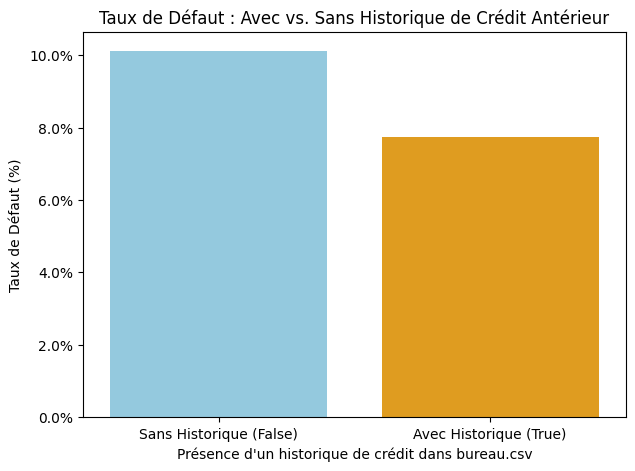



--- Distribution du nombre de crédits antérieurs par statut de prêt ---


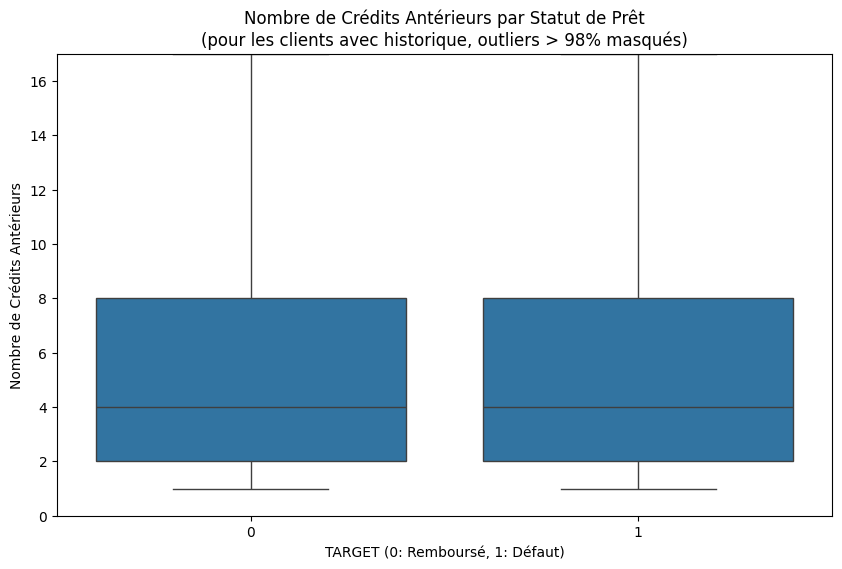

In [11]:
print("Analyse de la relation entre les crédits antérieurs (bureau.csv) et la cible...\n")

# 1. Calculer le nombre de crédits antérieurs pour chaque client
# On groupe par SK_ID_CURR et on compte le nombre d'entrées (crédits) pour chaque client.
previous_loan_counts = bureau_df.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count()
previous_loan_counts = previous_loan_counts.rename(columns={'SK_ID_BUREAU': 'PREVIOUS_LOAN_COUNT'})

print("Aperçu du nombre de crédits antérieurs par client :")
display(previous_loan_counts.head())
print("\n")

# 2. Joindre cette information à application_train
# On utilise une jointure à gauche pour garder tous les clients de app_train
app_train_with_bureau = app_train.merge(previous_loan_counts, on='SK_ID_CURR', how='left')

# Les clients de app_train qui n'étaient pas dans bureau.csv auront un NaN.
# On remplace ces NaN par 0, car cela signifie 0 crédit antérieur.
app_train_with_bureau['PREVIOUS_LOAN_COUNT'] = app_train_with_bureau['PREVIOUS_LOAN_COUNT'].fillna(0)

# 3. Analyse de la relation

# a) Taux de défaut : clients avec vs. sans historique de crédit
print("--- Taux de défaut selon la présence d'un historique de crédit (dans bureau.csv) ---")

# Créer une catégorie pour une visualisation simple
app_train_with_bureau['HAS_PREVIOUS_LOANS'] = app_train_with_bureau['PREVIOUS_LOAN_COUNT'] > 0

default_rate_by_history = app_train_with_bureau.groupby('HAS_PREVIOUS_LOANS')['TARGET'].mean()

plt.figure(figsize=(7, 5))
sns.barplot(x=default_rate_by_history.index, 
            y=default_rate_by_history.values, 
            hue=default_rate_by_history.index,
            palette={True: "orange", False: "skyblue"},
            legend=False)
plt.title("Taux de Défaut : Avec vs. Sans Historique de Crédit Antérieur")
plt.ylabel("Taux de Défaut (%)")
plt.xlabel("Présence d'un historique de crédit dans bureau.csv")
plt.xticks([0, 1], ['Sans Historique (False)', 'Avec Historique (True)'])
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))
plt.show()
print("\n")

# b) Distribution du nombre de crédits antérieurs par classe de TARGET
print("--- Distribution du nombre de crédits antérieurs par statut de prêt ---")

plt.figure(figsize=(10, 6))
# On se concentre sur les clients qui ont un historique pour voir la distribution
sns.boxplot(x='TARGET', y='PREVIOUS_LOAN_COUNT', data=app_train_with_bureau[app_train_with_bureau['HAS_PREVIOUS_LOANS']])
# On limite l'axe Y pour une meilleure lisibilité, car quelques clients ont énormément de crédits
plt.ylim(0, app_train_with_bureau['PREVIOUS_LOAN_COUNT'].quantile(0.98))
plt.title("Nombre de Crédits Antérieurs par Statut de Prêt\n(pour les clients avec historique, outliers > 98% masqués)")
plt.xlabel("TARGET (0: Remboursé, 1: Défaut)")
plt.ylabel("Nombre de Crédits Antérieurs")
plt.show()

Chargement du fichier previous_application.csv réussi.

--- Informations Générales sur previous_application.csv ---
Dimensions du DataFrame previous_app_df : (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-

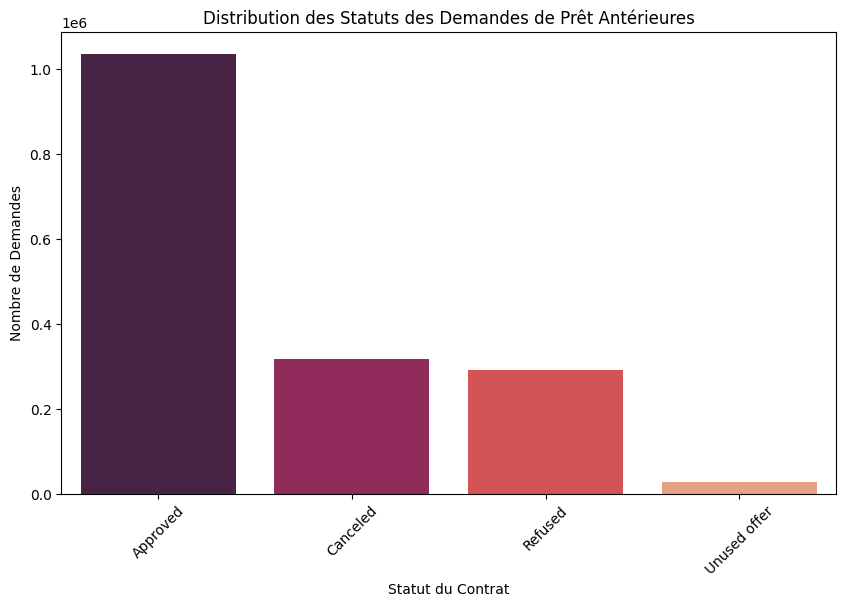



--- Analyse des Valeurs Manquantes dans previous_application.csv (Top 10) ---


,Valeurs Manquantes,Pourcentage (%)
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_LAST_DUE,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129


In [14]:
print("Chargement du fichier previous_application.csv réussi.\n")

print("--- Informations Générales sur previous_application.csv ---")
print(f"Dimensions du DataFrame previous_app_df : {previous_app_df.shape}")
display(previous_app_df.head())
print("\n")
previous_app_df.info()
print("\n")

# --- Analyse de NAME_CONTRACT_STATUS ---
print("--- Distribution de la variable NAME_CONTRACT_STATUS ---")
contract_status_counts = previous_app_df['NAME_CONTRACT_STATUS'].value_counts(dropna=False)
print(contract_status_counts)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=contract_status_counts.index, 
    y=contract_status_counts.values, 
    hue=contract_status_counts.index,
    palette="rocket",
    legend=False
)
plt.title('Distribution des Statuts des Demandes de Prêt Antérieures')
plt.xlabel('Statut du Contrat')
plt.ylabel('Nombre de Demandes')
plt.xticks(rotation=45)
plt.show()
print("\n")

# Analyse rapide des valeurs manquantes
print("--- Analyse des Valeurs Manquantes dans previous_application.csv (Top 10) ---")
missing_values = previous_app_df.isnull().sum()
missing_percentage = (missing_values / len(previous_app_df)) * 100
missing_stats = pd.DataFrame({'Valeurs Manquantes': missing_values, 'Pourcentage (%)': missing_percentage})
missing_stats_sorted = missing_stats[missing_stats['Pourcentage (%)'] > 0].sort_values(by='Pourcentage (%)', ascending=False)

if not missing_stats_sorted.empty:
    display(missing_stats_sorted.head(20))
else:
    print("Aucune valeur manquante détectée dans previous_application.csv.")

Analyse de l'impact des refus de prêts antérieurs sur la cible...

Aperçu du nombre de refus antérieurs par client :


,SK_ID_CURR,PREVIOUS_REFUSAL_COUNT
0,100006,1
1,100011,1
2,100027,1
3,100030,10
4,100035,8




--- Taux de défaut selon la présence d'un refus de prêt antérieur ---


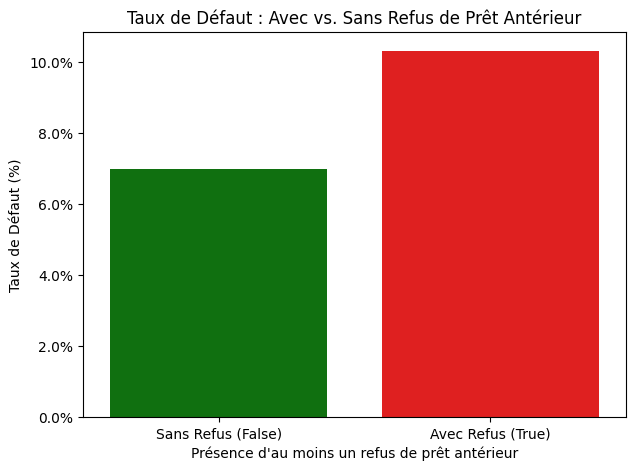

In [15]:
print("Analyse de l'impact des refus de prêts antérieurs sur la cible...\n")

# 1. Isoler les demandes refusées et les compter par client
refused_apps = previous_app_df[previous_app_df['NAME_CONTRACT_STATUS'] == 'Refused']

# Compter le nombre de refus par SK_ID_CURR
refused_counts = refused_apps.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count()
refused_counts = refused_counts.rename(columns={'SK_ID_PREV': 'PREVIOUS_REFUSAL_COUNT'})

print("Aperçu du nombre de refus antérieurs par client :")
display(refused_counts.head())
print("\n")

# 2. Joindre cette information à application_train
# Utiliser une jointure à gauche pour garder tous les clients de app_train
app_train_with_refusals = app_train.merge(refused_counts, on='SK_ID_CURR', how='left')

# Remplacer les NaN par 0 (clients sans refus antérieurs)
app_train_with_refusals['PREVIOUS_REFUSAL_COUNT'] = app_train_with_refusals['PREVIOUS_REFUSAL_COUNT'].fillna(0)

# Créer une catégorie binaire pour une visualisation simple
app_train_with_refusals['HAD_PREVIOUS_REFUSAL'] = app_train_with_refusals['PREVIOUS_REFUSAL_COUNT'] > 0

# 3. Comparer le taux de défaut
print("--- Taux de défaut selon la présence d'un refus de prêt antérieur ---")

default_rate_by_refusal = app_train_with_refusals.groupby('HAD_PREVIOUS_REFUSAL')['TARGET'].mean()

plt.figure(figsize=(7, 5))
sns.barplot(x=default_rate_by_refusal.index, 
            y=default_rate_by_refusal.values, 
            hue=default_rate_by_refusal.index,
            palette={True: "red", False: "green"},
            legend=False)

plt.title("Taux de Défaut : Avec vs. Sans Refus de Prêt Antérieur")
plt.ylabel("Taux de Défaut (%)")
plt.xlabel("Présence d'au moins un refus de prêt antérieur")
plt.xticks([0, 1], ['Sans Refus (False)', 'Avec Refus (True)'])
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))
plt.show()
plt.close()